In [32]:
import numpy as np
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import pickle
import os
import math

In [33]:
def haversine(coord1, coord2):
    """
    Calculate the Haversine distance between two points on the Earth.

    Args:
        coord1 (tuple): (longitude, latitude) of the first point in degrees.
        coord2 (tuple): (longitude, latitude) of the second point in degrees.

    Returns:
        float: Distance in kilometers.
    """
    # Radius of the Earth in km
    R = 6371.0  
    
    # Convert degrees to radians
    lon1, lat1 = map(math.radians, coord1)
    lon2, lat2 = map(math.radians, coord2)
    
    # Differences in coordinates
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    # Haversine formula
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    # Compute the distance
    distance = R * c
    
    return distance

In [27]:
raw_data_path = '../data/raw/'
os.listdir(raw_data_path)

['ViennaAustria.pkl',
 'ViennaAustria_r8_travel_times.pkl',
 'ViennaAustria_networks.pkl',
 'ViennaAustria_r8_nearest_loc.pkl',
 'ViennaAustria_r8_hex_grid.pkl']

In [ ]:
with open(f'{raw_data_path}ViennaAustria_r8_travel_times.pkl','rb') as f:
    gdf_travel_time = pickle.load(f)

with open('../data/raw/ViennaAustria_r8_nearest_loc.pkl','rb') as f:
    gdf_nearest_loc = pickle.load(f)

display(gdf_travel_time.head(5))
display(gdf_nearest_loc.head(5))

,geometry,hex_id,timeto_shop_supermarket
0,"POLYGON ((16.50612 48.17424, 16.50206 48.17170...",885250cebbfffff,50.183000
1,"POLYGON ((16.52967 48.16208, 16.52561 48.15954...",885250ce89fffff,77.896167
2,"POLYGON ((16.49395 48.16661, 16.48989 48.16407...",885250ceb7fffff,30.450333
3,"POLYGON ((16.27151 48.17955, 16.26746 48.17702...",8852504663fffff,7.548833
4,"POLYGON ((16.30338 48.18162, 16.29932 48.17908...",88525054a7fffff,4.790833


,geometry,hex_id,nearest_shop_supermarket
0,"POLYGON ((16.50612 48.17424, 16.50206 48.17170...",885250cebbfffff,"(16.473657, 48.169685)"
1,"POLYGON ((16.52967 48.16208, 16.52561 48.15954...",885250ce89fffff,"(16.473657, 48.169685)"
2,"POLYGON ((16.49395 48.16661, 16.48989 48.16407...",885250ceb7fffff,"(16.473657, 48.169685)"
3,"POLYGON ((16.27151 48.17955, 16.26746 48.17702...",8852504663fffff,"(16.270322, 48.177753)"
4,"POLYGON ((16.30338 48.18162, 16.29932 48.17908...",88525054a7fffff,"(16.297919, 48.185629)"


In [35]:
cen = gdf_nearest_loc.geometry.iloc[0].centroid
cen = (cen.x,cen.y)
ame = gdf_nearest_loc.nearest_shop_supermarket.iloc[0]
print(cen)
print(ame)
print(haversine(cen,ame))

(16.502193097460083, 48.17626363340371)
(16.473657, 48.169685)
2.238940971073067


<Axes: >

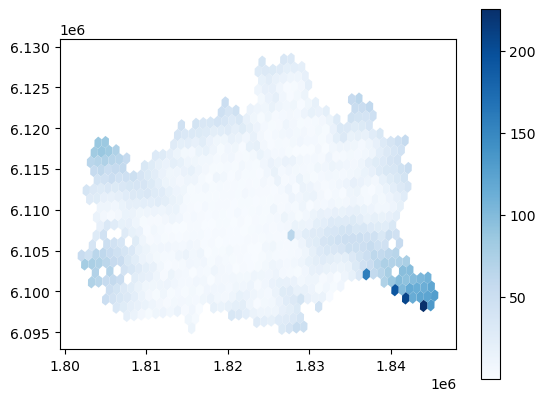

In [41]:
gdf_plot = gdf_travel_time.to_crs('epsg:3395')
gdf_plot.plot(column='timeto_shop_supermarket',cmap='Blues',legend=True)

<Axes: >

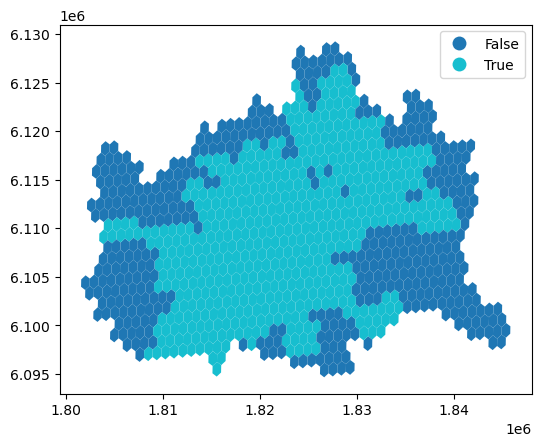

In [40]:
gdf_plot = gdf_travel_time.to_crs('epsg:3395')
gdf_plot['<15_min'] = gdf_travel_time['timeto_shop_supermarket']<15
gdf_plot.plot(column='<15_min',legend=True)